In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import copy

path=r'D:/Study/Python/openCV/College/res/'

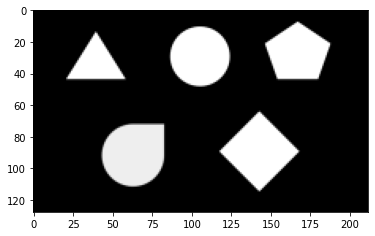

In [9]:
img = cv2.imread(path+'five_shapes.png',0)
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
img=cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
plt.imshow(img,'gray')

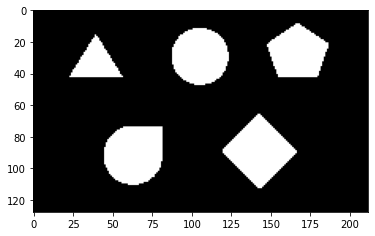

In [10]:
blur=cv2.blur(img,(3,3))
ret, thresh=cv2.threshold(blur,200,255,cv2.THRESH_BINARY)
plt.imshow(thresh,'gray')

In [11]:
b1=np.array([[255,2,2],[255,0,2],[255,2,2]],dtype=np.uint8)
b2=np.array([[255,255,255],[2,0,2],[2,2,2]],dtype=np.uint8)
b3=np.array([[2,2,255],[2,0,255],[2,2,255]],dtype=np.uint8)
b4=np.array([[2,2,2],[2,0,2],[255,255,255]],dtype=np.uint8)
kernel_c=[[b1],[b2],[b3],[b4]]

In [12]:
def con(m1,m2):
    for i in range(3):
        for j in range(3):
            if(m2[i,j]!=2):
                if(m2[i,j]!=m1[i,j]):
                    return False
    return True
def hitandmiss(img,kernel):
    op=np.zeros(img.shape,'uint8') 
    img_pad=cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
    img_res=np.zeros(img.shape,'uint8')
    for k in range(len(kernel)):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if(con(img_pad[i:i+3,j:j+3],kernel[k])==True):
                    img_res[i,j]=255
                else:
                    img_res[i,j]=0
        op=op|img_res
    return op

In [13]:
def convex_hull(img):
    x2=np.zeros(img.shape,'uint8')
    for i in range(len(kernel_c)):
        x1=np.copy(img)
        while(True):
            x=hitandmiss(x1,kernel_c[i])|x1
            if np.array_equal(x,x1):
                break
            x1=np.copy(x)
        x2=x2|x
    return x2

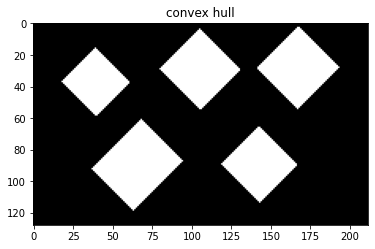

In [14]:
plt.title('convex hull')
plt.imshow(convex_hull(thresh),'gray')